In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.images, digits.target
X_binary = np.where(X > 8, 1.0, 0.0).reshape(-1, 64).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float16)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test  = torch.tensor(X_test,  dtype=torch.float16)
y_test  = torch.tensor(y_test,  dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test,  y_test),  batch_size=32, shuffle=False)


class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(64, 3, bias=False)
        self.output = nn.Linear(3, 10, bias=False)
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

model = ANN().half()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



print("Training...")
loss_history = []

for epoch in range(500):
    epoch_loss = 0.0
    num_batches = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:02d}, Avg Loss = {avg_loss:.4f}")


correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
print(f"\n✅ Final Test Accuracy: {100 * correct / len(y_test):.2f}%")


hidden_weights = model.hidden.weight.detach().cpu().half().numpy()
output_weights = model.output.weight.detach().cpu().half().numpy()

np.savetxt("hidden_weights.txt", hidden_weights, fmt="%.5f")
np.savetxt("output_weights.txt", output_weights, fmt="%.5f")
print("🎉 Weights saved: hidden_weights.txt + output_weights.txt")


Training...
Epoch 10, Avg Loss = 2.1734
Epoch 20, Avg Loss = 2.0194
Epoch 30, Avg Loss = 1.8861
Epoch 40, Avg Loss = 1.7814
Epoch 50, Avg Loss = 1.6924
Epoch 60, Avg Loss = 1.6241
Epoch 70, Avg Loss = 1.5735
Epoch 80, Avg Loss = 1.5351
Epoch 90, Avg Loss = 1.5022
Epoch 100, Avg Loss = 1.4752
Epoch 110, Avg Loss = 1.4302
Epoch 120, Avg Loss = 1.3600
Epoch 130, Avg Loss = 1.2599
Epoch 140, Avg Loss = 1.1635
Epoch 150, Avg Loss = 1.0961
Epoch 160, Avg Loss = 1.0483
Epoch 170, Avg Loss = 1.0100
Epoch 180, Avg Loss = 0.9798
Epoch 190, Avg Loss = 0.9534
Epoch 200, Avg Loss = 0.9305
Epoch 210, Avg Loss = 0.9138
Epoch 220, Avg Loss = 0.8994
Epoch 230, Avg Loss = 0.8856
Epoch 240, Avg Loss = 0.8754
Epoch 250, Avg Loss = 0.8665
Epoch 260, Avg Loss = 0.8578
Epoch 270, Avg Loss = 0.8516
Epoch 280, Avg Loss = 0.8449
Epoch 290, Avg Loss = 0.8405
Epoch 300, Avg Loss = 0.8351
Epoch 310, Avg Loss = 0.8304
Epoch 320, Avg Loss = 0.8260
Epoch 330, Avg Loss = 0.8238
Epoch 340, Avg Loss = 0.8197
Epoch 350, 

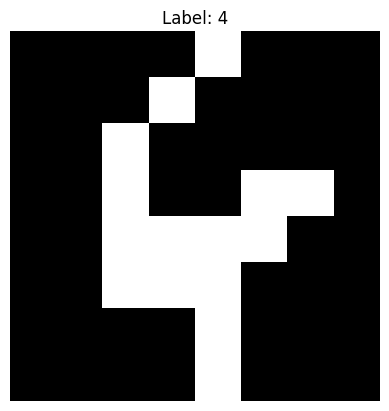

// Label: 4
        img_data[ 0] = 8'd0 ; img_data[ 1] = 8'd0 ; img_data[ 2] = 8'd0 ; img_data[ 3] = 8'd0 ; img_data[ 4] = 8'd1 ; img_data[ 5] = 8'd0 ; img_data[ 6] = 8'd0 ; img_data[ 7] = 8'd0 ; 
        img_data[ 8] = 8'd0 ; img_data[ 9] = 8'd0 ; img_data[10] = 8'd0 ; img_data[11] = 8'd1 ; img_data[12] = 8'd0 ; img_data[13] = 8'd0 ; img_data[14] = 8'd0 ; img_data[15] = 8'd0 ; 
        img_data[16] = 8'd0 ; img_data[17] = 8'd0 ; img_data[18] = 8'd1 ; img_data[19] = 8'd0 ; img_data[20] = 8'd0 ; img_data[21] = 8'd0 ; img_data[22] = 8'd0 ; img_data[23] = 8'd0 ; 
        img_data[24] = 8'd0 ; img_data[25] = 8'd0 ; img_data[26] = 8'd1 ; img_data[27] = 8'd0 ; img_data[28] = 8'd0 ; img_data[29] = 8'd1 ; img_data[30] = 8'd1 ; img_data[31] = 8'd0 ; 
        img_data[32] = 8'd0 ; img_data[33] = 8'd0 ; img_data[34] = 8'd1 ; img_data[35] = 8'd1 ; img_data[36] = 8'd1 ; img_data[37] = 8'd1 ; img_data[38] = 8'd0 ; img_data[39] = 8'd0 ; 
        img_data[40] = 8'd0 ; img_data[41] = 8'd0 ; img_data[42

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np


digits = load_digits()
X, y = digits.images, digits.target
X_binary = np.where(X > 8, 1.0, 0.0).reshape(-1, 64).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)


idx = 88
input_image = X_test[idx].astype(np.float16)  # shape: (64,)
label = y_test[idx]




plt.imshow(input_image.reshape(8, 8), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


raw_image = input_image.astype(np.uint8)
print(f"// Label: {label}")
for i in range(64):
    if i % 8 == 0:
        print("        ", end="")
    print(f"img_data[{i:2}] = 8'd{raw_image[i]:<2}; ", end="")
    if i % 8 == 7:
        print()

def load_float_weights(path, row, col):
    data = np.loadtxt(path, dtype=np.float16)
    assert data.shape == (row, col)
    return data

hidden_weights = load_float_weights("hidden_weights.txt", 3, 64)   # shape: (3, 64)
output_weights = load_float_weights("output_weights.txt", 10, 3)   # shape: (10, 3)


hidden_out = np.dot(hidden_weights, input_image)         # (3,)
hidden_relu = np.maximum(hidden_out, 0).astype(np.float16)
output_logits = np.dot(output_weights, hidden_relu).astype(np.float32)  # (10,)


print("\n// Output neuron values (float32 logits):")
for i in range(10):
    print(f"neuron[{i}] = {output_logits[i]:.6f};")

pred = int(np.argmax(output_logits))
print(f"\n✅ Predicted class = {pred}")


binary_image = input_image.astype(np.uint8)

print(f"\n// Label: {label}")
print("img_data[63:0] = 64'b", end="")
for i in range(63, -1, -1):
    print(f"{binary_image[i]}", end="")
print(";")

print("\n// Hidden layer ReLU outputs:")
for i in range(3):
    print(f"relu_out[{i}] = {hidden_relu[i]:.6f};")


In [ ]:
import numpy as np
import struct
from sklearn.datasets import load_digits


def float_to_fp16_hex(val):
    b = struct.pack('>e', np.float16(val))  # big endian float16
    return f"16'h{b.hex().upper()}"


def load_float_weights(path, row, col):
    data = np.loadtxt(path, dtype=np.float16)
    assert data.shape == (row, col)
    return data



digits = load_digits()
X, y = digits.images, digits.target
X_binary = np.where(X > 8, 1.0, 0.0).reshape(-1, 64).astype(np.float32)

X_test = X_binary
y_test = y

hidden_weights = load_float_weights("hidden_weights.txt", 3, 64)


idx = 88
input_image = X_test[idx].astype(np.float16)  # shape: (64,)
label = y_test[idx]


hidden_out = np.dot(hidden_weights, input_image)
hidden_relu = np.maximum(hidden_out, 0).astype(np.float16)


print(f"\n// Label: {label}")
for i in range(3):
    val = hidden_relu[i]
    hex_val = float_to_fp16_hex(val)
    print(f"relu_out[{i}] = {hex_val};  // {val:.6f}")



// Label: 6
relu_out[0] = 16'h4693;  // 6.574219
relu_out[1] = 16'h0000;  // 0.000000
relu_out[2] = 16'h3D37;  // 1.303711


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === Load and binarize digits dataset ===
digits = load_digits()
X, y = digits.images, digits.target
X_binary = np.where(X > 8, 1.0, 0.0).reshape(-1, 64).astype(np.uint8)

# === Split dataset ===
_, X_test, _, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# === Load trained weights ===
hidden_weights = np.loadtxt("hidden_weights.txt", dtype=np.float16).reshape(3, 64)
output_weights = np.loadtxt("output_weights.txt", dtype=np.float16).reshape(10, 3)

# === Extract index 1 to 256 ===
X_subset = X_test[1:257]
y_subset = y_test[1:257]

print("// Verilog image_mem initialization")
print("// Format: image_mem[i] = 64'bxxxxxxxx...;")

for idx, binary_image in enumerate(X_subset):
    # === Verilog binary (MSB first) ===
    bits = ''.join(str(b) for b in binary_image[::-1])  # MSB first

    # === Simulate FP16 inference ===
    image_fp16 = binary_image.astype(np.float16)
    hidden_out = np.dot(hidden_weights, image_fp16)
    relu_out = np.maximum(hidden_out, 0).astype(np.float16)
    logits = np.dot(output_weights, relu_out).astype(np.float32)
    prediction = int(np.argmax(logits))

    # === Output with prediction ===
    print(f"image_mem[{idx:3}] = 64'b{bits};  // Label: {y_subset[idx]}, Predict: {prediction}")


// Verilog image_mem initialization
// Format: image_mem[i] = 64'bxxxxxxxx...;
image_mem[  0] = 64'b0001110000110000001000000010000000111100001101000011110000001100;  // Label: 9, Predict: 9
image_mem[  1] = 64'b0001110000100100001000000011000000011000000100000001010000011000;  // Label: 3, Predict: 3
image_mem[  2] = 64'b0000100000011000000100000001000000100100010001000111110001111000;  // Label: 7, Predict: 9
image_mem[  3] = 64'b0011110001100100000001000000110000011000000100000001110000011100;  // Label: 2, Predict: 3
image_mem[  4] = 64'b1111110000111100000110000001100000001100000011100000110000001100;  // Label: 1, Predict: 1
image_mem[  5] = 64'b0001110000011000000100000001110000001100000001100011110001111000;  // Label: 5, Predict: 5
image_mem[  6] = 64'b0110100000111000000100000001000000100000001001000010110000011000;  // Label: 2, Predict: 2
image_mem[  7] = 64'b0000110000011000000100000001110000001100000001000000110000111100;  // Label: 5, Predict: 5
image_mem[  8] = 64'b0000

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === Load dataset and labels ===
digits = load_digits()
_, X_test, _, y_test = train_test_split(digits.images.reshape(-1, 64), digits.target, test_size=0.2, random_state=42)
y_true = y_test[1:257]  # Golden labels

# === NPU prediction results ===
npu_results = np.array([
    9, 3, 9, 3, 1, 5, 2, 5, 2, 1, 8, 4, 9, 4, 8, 3, 7, 2, 8, 4,
    3, 3, 7, 2, 6, 2, 2, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6,
    3, 1, 9, 6, 1, 3, 0, 4, 5, 5, 1, 2, 5, 4, 0, 5, 0, 0, 1, 5,
    4, 5, 2, 4, 5, 1, 0, 7, 5, 0, 5, 5, 4, 7, 0, 4, 3, 5, 9, 9,
    0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 1, 3, 5, 2, 9, 4, 0, 4, 1,
    3, 5, 9, 1, 3, 5, 7, 4, 2, 7, 7, 4, 4, 1, 9, 4, 3, 7, 7, 2,
    6, 9, 4, 7, 8, 3, 7, 3, 1, 7, 5, 8, 9, 0, 6, 6, 4, 2, 7, 0,
    9, 4, 9, 9, 9, 4, 9, 0, 5, 5, 6, 6, 0, 6, 4, 2, 3, 3, 7, 7,
    2, 9, 0, 6, 5, 2, 6, 5, 7, 9, 8, 4, 1, 1, 3, 7, 7, 2, 2, 3,
    9, 8, 0, 3, 8, 8, 5, 6, 9, 9, 4, 1, 3, 7, 3, 9, 6, 1, 8, 5,
    9, 5, 7, 1, 3, 4, 2, 1, 5, 4, 4, 9, 6, 8, 2, 6, 0, 4, 5, 2,
    7, 1, 6, 4, 5, 6, 0, 9, 2, 3, 6, 8, 8, 5, 1, 4, 7, 6, 5, 1,
    5, 5, 1, 0, 3, 1, 7, 9, 3, 7, 4, 2, 2, 2, 3, 4
])

# === Compare results ===
diff_indices = np.where(npu_results != y_true)[0]
num_wrong = len(diff_indices)

print(f"✅ MSE = {np.mean((npu_results - y_true) ** 2):.6f}")
print(f"❌ Total wrong predictions = {num_wrong} / 256")
print("\n🔍 Incorrect Predictions (index: predicted ≠ true):")
for i in diff_indices:
    print(f"  Index {i:3}: Predict = {npu_results[i]}, Label = {y_true[i]}")


✅ MSE = 5.671875
❌ Total wrong predictions = 72 / 256

🔍 Incorrect Predictions (index: predicted ≠ true):
  Index   2: Predict = 9, Label = 7
  Index   3: Predict = 3, Label = 2
  Index  10: Predict = 8, Label = 9
  Index  12: Predict = 9, Label = 0
  Index  14: Predict = 8, Label = 2
  Index  17: Predict = 2, Label = 8
  Index  21: Predict = 3, Label = 9
  Index  23: Predict = 2, Label = 5
  Index  25: Predict = 2, Label = 3
  Index  26: Predict = 2, Label = 5
  Index  31: Predict = 2, Label = 1
  Index  40: Predict = 3, Label = 9
  Index  42: Predict = 9, Label = 3
  Index  47: Predict = 4, Label = 6
  Index  51: Predict = 2, Label = 9
  Index  53: Predict = 4, Label = 6
  Index  55: Predict = 5, Label = 9
  Index  59: Predict = 5, Label = 0
  Index  65: Predict = 1, Label = 7
  Index  69: Predict = 0, Label = 9
  Index  76: Predict = 3, Label = 5
  Index  91: Predict = 1, Label = 8
  Index  96: Predict = 4, Label = 0
  Index  97: Predict = 0, Label = 4
  Index  99: Predict = 1, Labe

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
X, y = digits.images, digits.target
X_binary = np.where(X > 8, 1.0, 0.0).reshape(-1, 64).astype(np.uint8)
_, X_test, _, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)


X_subset = X_test[1:257]
y_true = y_test[1:257]


hidden_weights = np.loadtxt("hidden_weights.txt", dtype=np.float16)
output_weights = np.loadtxt("output_weights.txt", dtype=np.float16)

predicted_software = []
for x in X_subset:
    hidden = np.dot(hidden_weights, x)
    relu = np.maximum(hidden, 0).astype(np.float16)
    logits = np.dot(output_weights, relu).astype(np.float32)
    predicted_software.append(np.argmax(logits))
predicted_software = np.array(predicted_software)


npu_results = np.array([
    9, 3, 9, 3, 1, 5, 2, 5, 2, 1, 8, 4, 9, 4, 8, 3, 7, 2, 8, 4,
    3, 3, 7, 2, 6, 2, 2, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6,
    3, 1, 9, 6, 1, 3, 0, 4, 5, 5, 1, 2, 5, 4, 0, 5, 0, 0, 1, 5,
    4, 5, 2, 4, 5, 1, 0, 7, 5, 0, 5, 5, 4, 7, 0, 4, 3, 5, 9, 9,
    0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 1, 3, 5, 2, 9, 4, 0, 4, 1,
    3, 5, 9, 1, 3, 5, 7, 4, 2, 7, 7, 4, 4, 1, 9, 4, 3, 7, 7, 2,
    6, 9, 4, 7, 8, 3, 7, 3, 1, 7, 5, 8, 9, 0, 6, 6, 4, 2, 7, 0,
    9, 4, 9, 9, 9, 4, 9, 0, 5, 5, 6, 6, 0, 6, 4, 2, 3, 3, 7, 7,
    2, 9, 0, 6, 5, 2, 6, 5, 7, 9, 8, 4, 1, 1, 3, 7, 7, 2, 2, 3,
    9, 8, 0, 3, 8, 8, 5, 6, 9, 9, 4, 1, 3, 7, 3, 9, 6, 1, 8, 5,
    9, 5, 7, 1, 3, 4, 2, 1, 5, 4, 4, 9, 6, 8, 2, 6, 0, 4, 5, 2,
    7, 1, 6, 4, 5, 6, 0, 9, 2, 3, 6, 8, 8, 5, 1, 4, 7, 6, 5, 1,
    5, 5, 1, 0, 3, 1, 7, 9, 3, 7, 4, 2, 2, 2, 3, 4
])


mismatch_idx = np.where(npu_results != predicted_software)[0]

print(f"✅ Total images: {len(npu_results)}")
print(f"❌ Mismatches: {len(mismatch_idx)}")
print(f"✅ Accuracy: {(len(npu_results) - len(mismatch_idx)) / len(npu_results):.2%}\n")

print("Mismatch details:")
for idx in mismatch_idx:
    print(f"Image {idx}: NPU = {npu_results[idx]}, Software = {predicted_software[idx]}, Label = {y_true[idx]}")


✅ Total images: 256
❌ Mismatches: 3
✅ Accuracy: 98.83%

Mismatch details:
Image 42: NPU = 9, Software = 3, Label = 3
Image 142: NPU = 9, Software = 0, Label = 6
Image 197: NPU = 1, Software = 4, Label = 4
